In [14]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]==b'Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [17]:
import modisco
#track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
#    task_names=["Nanog_profile_wn"],
#    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
#    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
#    one_hot=onehot_seq)
#grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
#                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
#                +"/Nanog/out/profile/wn/modisco.h5","r")
#grp = h5py.File("modisco.h5","r")
#loaded_tfmodisco_results =\
#    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
#grp.close()
#patterns = (loaded_tfmodisco_results
#            .metacluster_idx_to_submetacluster_results["metacluster_0"]
#            .seqlets_to_patterns_result.patterns)

In [18]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [19]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [20]:
#visualize the saved patterns:
"""%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit d9e3bb6d7e2497cfc64d7984daa25f3828885ef1 (HEAD -> dev, origin/dev)
Author: AvantiShri <avanti.shrikumar@gmail.com>
Date:   Sat Dec 4 01:26:42 2021 -0800

    version bump for pynnd-with-continjacc
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 2.990170112
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.005412905696721282
Computing threshold
Subsampling!
For increasing = True , the minimum IR precision was 0.449935432911382 occurring at 0.0 implying a frac_neg of 0.8179683983151297
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.14211949840177035 occurring at -1.3550743460655212e-07 implying a frac_neg of 0.1656635139008312
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.022064685821533203  and  0.19958865642547607 with frac passing 0.093862
Passing windows frac was 0.093862 , which is above  0.03 

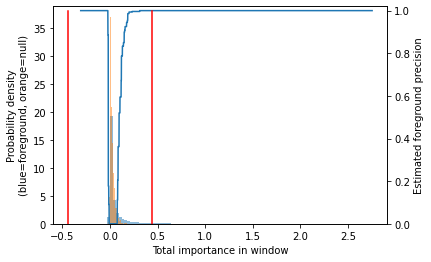

Got 8793 coords
After resolving overlaps, got 8793 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698818367346939
MEMORY 3.224018944
8793 identified in total
1 activity patterns with support >= 2000 out of 2 possible patterns
Metacluster sizes:  [8793]
Idx to activities:  {0: '1'}
MEMORY 3.224731648
On metacluster 0
Metacluster size 8793
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 8793
(Round 1) Computing coarse affmat
MEMORY 3.224756224
2021-12-04 04:28:34.478083 Building the index
Sat Dec  4 04:28:34 2021 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
2021-12-04 05:03:55.941671 Preparing the index
Sat Dec  4 05:05:40 2021 Forward diversification reduced edges from 263790 to 75540
Sat Dec  4 05:06:51 2021 Reverse diversification reduced edges from 75540 to 75540
Sat Dec  4 05

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.6min


Quality: 0.41880722795165726
Quality: 0.42109663660561913
Got 5 clusters after round 1
Counts:
{1: 2247, 4: 312, 2: 2111, 0: 3555, 3: 568}
MEMORY 4.760838144
(Round 1) Aggregating seqlets in each cluster
MEMORY 4.760838144
Aggregating for cluster 0 with 3555 seqlets
MEMORY 4.760838144


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  2.6min finished


Skipped 138 due to duplicates
Trimming eliminated 0 seqlets out of 3417
Aggregating for cluster 1 with 2247 seqlets
MEMORY 4.786454528
Skipped 1 seqlets that went over sequence edge during flank expansion
Skipped 47 due to duplicates
Trimming eliminated 0 seqlets out of 2199
Aggregating for cluster 2 with 2111 seqlets
MEMORY 4.786466816
Skipped 21 due to duplicates
Trimming eliminated 0 seqlets out of 2090
Aggregating for cluster 3 with 568 seqlets
MEMORY 4.790362112
Trimming eliminated 0 seqlets out of 568
Aggregating for cluster 4 with 312 seqlets
MEMORY 4.790403072
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 310
(Round 2) num seqlets: 8583
(Round 2) Computing coarse affmat
MEMORY 4.790403072
2021-12-04 14:00:55.681092 Building the index
Sat Dec  4 14:00:55 2021 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
2021-12-04 14:47:33.448570 Preparing the index
Sat Dec 

In [ ]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.seqlet_embedding.advanced_gapped_kmer
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
import modisco.seqlet_embedding
reload(modisco.seqlet_embedding)
import modisco
reload(modisco)
reload(modisco.util)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,#[5,9,13,17,21],
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        
        embedder_factory=modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(),
        use_pynnd_with_continjacc=True,
        #kmer_len=6,
        #num_gaps=2,
        #num_mismatches=0,        
        n_cores=10,
        final_min_cluster_size=60
    )
)

n = 5000
results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs[:n]},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp[:n]},
    one_hot=onehot_seq[:n])

In [ ]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "v0.5.17.0_tag.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

In [ ]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()

In [ ]:
import h5py
import numpy as np
from importlib import reload
import modisco
reload(modisco.util)
reload(modisco.core)
reload(modisco.tfmodisco_workflow)
from modisco.tfmodisco_workflow import workflow

track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

grp = h5py.File(file_path,"r")
loaded_tfmodisco_results =\
    workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()

In [ ]:
import modisco
import modisco.util
reload(modisco.util)
reload(modisco.cluster.core)
reload(modisco.coordproducers)
from modisco.visualization import viz_sequence
reload(modisco.aggregator)
from modisco import hit_scoring
reload(modisco.hit_scoring)
from modisco.hit_scoring import densityadapted_hitscoring
reload(modisco.hit_scoring.densityadapted_hitscoring)
reload(densityadapted_hitscoring)
reload(modisco.cluster.core)

orig_patterns = (loaded_tfmodisco_results.metacluster_idx_to_submetacluster_results["metacluster_0"]
                .seqlets_to_patterns_result.patterns)

#The hit-scorer works in two stages:
# (1) Identifying regions of high importance ("seqlets")
# (2) Mapping those seqlets to patterns (motifs)
#(The two stages are independent of each other)

#instantiate the hit_scorer by providing the patterns
# that identified seqlets will be mapped to. The patterns
# will be trimmed to target_seqlet_size
hit_scorer = densityadapted_hitscoring.MakeHitScorer(
    patterns=orig_patterns,
    target_seqlet_size=25,
    bg_freq=np.mean(onehot_seq, axis=(0,1)),
    task_names_and_signs=[("Nanog_profile_wn",1)],
    n_cores=10)

#set the method used to identify coordinates of high importance ("seqlets")
#You have to provide a contribution score track as this will be used
# to calibrate the threshold used for seqlet identification. You
# can also optionally provide an empirical null distribution track via
# the 'null_track' argument, similar to when tf-modisco is first run.
hit_scorer.set_coordproducer(contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
                             core_sliding_window_size=7,
                             target_fdr=0.2,
                             min_passing_windows_frac=0.03,
                             max_passing_windows_frac=0.2,
                             separate_pos_neg_thresholds=False,                             
                             max_seqlets_total=np.inf)


In [ ]:
from modisco.visualization import viz_sequence

for patternidx,pattern in enumerate(hit_scorer.seqlet_scorer.class_patterns):
    print("Pattern idx:",patternidx)
    viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

In [ ]:
#Now that the hit-scorer is configured, you can call it on some data to
# get the motif hit calls.
#Note that the values provided to contrib_scores below DO NOT have to be
# the same as the values provided to set_coordproducer above.

num_to_score = 30 #the number of sequences to score, for speed
(exampleidx_to_matches, patternidx_to_matches) = hit_scorer(
           contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs[:num_to_score]},
           hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp[:num_to_score]},
           one_hot=onehot_seq[:num_to_score],
           hits_to_return_per_seqlet=1)

In [ ]:
from modisco.visualization import viz_sequence

#visualize the matches
for exampleidx in list(sorted(exampleidx_to_matches.keys()))[:num_to_score]:
    matches = exampleidx_to_matches[exampleidx]
    
    viz_sequence.plot_weights(
        nanog_profile_wn_contribs[exampleidx],
        highlight={'black': [
            (max(x.start,0), min(x.end,len(nanog_profile_wn_contribs[exampleidx])))
             for x in matches]},
        subticks_frequency=20)
    
    for i in range(len(orig_patterns)):
        matches_to_pattern = [x for x in matches if x.patternidx==i]
        if (len(matches_to_pattern) > 0):
            print("Matches to pattern",i)
            for match in matches_to_pattern:
                print(match)
                if (match.is_revcomp==False):
                    viz_sequence.plot_weights(nanog_profile_wn_contribs[exampleidx][match.start:match.end])
                else:
                    viz_sequence.plot_weights(nanog_profile_wn_contribs[exampleidx][match.start:match.end][::-1,::-1])
    